# 🎓 Examen Final: SQL y Gestión de Datos (15 Puntos)

**Contexto:** Eres el Data Steward de la **Universidad Santo Tomás**. Se acerca el cierre de semestre y la decanatura requiere una gestión intensiva de la base de datos: desde registrar ofertas de última hora hasta generar los indicadores finales de deserción y carga académica.

**Instrucciones:**
* Asegúrate de tener el archivo **`universidad.db`** en esta misma carpeta.
* Cada punto tiene un valor de **1.0** sobre 15.
* Usa `conn.commit()` después de las sentencias de modificación (INSERT/UPDATE/DELETE).
* Usa `pd.read_sql_query` para las consultas de selección (SELECT).

---

In [24]:
# 🛠️ CONFIGURACIÓN INICIAL
import sqlite3
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np

db_filename = '../DataSet/universidad.db'

if not os.path.exists(db_filename):
    print(f"⚠️ ERROR: No encuentro '{db_filename}'. Súbelo a esta carpeta.")
else:
    conn = sqlite3.connect(db_filename)
    cursor = conn.cursor()
    cursor.execute("PRAGMA foreign_keys = ON;")
    print(f"✅ Conectado a '{db_filename}'. ¡Listo para el examen!")

✅ Conectado a '../DataSet/universidad.db'. ¡Listo para el examen!


## 📝 Sección 1: Gestión Académica (DML) - 5 Puntos

**1. Apertura de Curso (INSERT)**
La facultad abre un nuevo curso electivo.
* Inserta en la tabla `Cursos`:
    * Nombre: **'Big Data & AI'**
    * Créditos: **5**
    * ID Profesor: **20**

**2. Nuevo Ingreso (INSERT)**
Registra a un nuevo estudiante en la tabla `Estudiantes`:
    * Nombre: **'Lionel'**
    * Apellido: **'Messi'**
    * Email: **'lio@usta.edu.co'**
    * Fecha Ingreso: '2024-11-25'

**3. Matrícula Manual (INSERT)**
Matricula al estudiante 'Lionel Messi' en el curso de 'Big Data & AI' que acabas de crear.
* *Pista:* Necesitarás averiguar primero qué ID le asignó la base de datos a Lionel y al curso.
* Nota final: `NULL`.

**4. Corrección de Créditos (UPDATE)**
El comité curricular decidió que 5 créditos es demasiado.
* Actualiza el curso 'Big Data & AI' para que tenga **3 créditos**.

**5. Retiro Definitivo (DELETE)**
El estudiante con **ID = 10** se retira de la universidad.
* Elimina todos sus registros de la tabla `Inscripciones` (para mantener la integridad, primero borramos sus clases).

pruebas

In [36]:
# df_00 = pd.read_sql_query(" SELECT 1 FROM Inscripciones WHERE id_estudiante=501 AND id_curso=101", conn)
# display(df_00)
# df_11 = pd.read_sql_query("SELECT count(1) FROM Cursos", conn)
# display(df_11)

In [2]:
# Espacio para Código DML (Recuerda hacer commit)

# 1. Inserta en la tabla `Cursos`:
#       SE NSERTAE SOLO SI NO EXISTE YA ESA INSCRIPCIÓN
curso_bigdata = 'Big Data & AI'
nuevo_curso = f"""
INSERT INTO Cursos (nombre_curso, creditos, id_profesor)
SELECT '{curso_bigdata}', 5, 20
WHERE NOT EXISTS (
    SELECT 1 FROM Cursos WHERE nombre_curso = '{curso_bigdata}'
);
"""
try:
    cursor = conn.cursor()
    cursor.execute(nuevo_curso)
    conn.commit()
    print("1) Nuevo curso insertado correctamente.")
except sqlite3.OperationalError as e:
    print(f"Error al insertar el nuevo curso: {e}")
    

# 2. Registra a un nuevo estudiante en la tabla `Estudiantes`:
#       SE NSERTAE SOLO SI NO EXISTE YA ESA INSCRIPCIÓN
nuevo_Estudiante = """ 
                     Insert into Estudiantes (nombre, apellido, email, fecha_ingreso) 
                     SELECT 'Lionel', 'Messi','lio@usta.edu.co','2024-11-25'
                     WHERE NOT EXISTS (
                     SELECT 1 FROM Estudiantes WHERE nombre = 'Lionel' AND apellido='Messi' AND email='lio@usta.edu.co'
                     );
                    """
try:
    cursor = conn.cursor()
    cursor.execute(nuevo_Estudiante)
    conn.commit()
    print("2) Nuevo Estudiante insertado correctamente.")
except sqlite3.OperationalError as e:
    print(f"Error al insertar el nuevo Estudiante: {e}")

# 3. Matricula al estudiante 'Lionel Messi' en el curso de 'Big Data & AI'
#       SE NSERTAE SOLO SI NO EXISTE YA ESA INSCRIPCIÓN
nuevo_Inscripciones = """
                        Insert into Inscripciones (id_estudiante,id_curso,fecha_inscripcion) 
                        SELECT 501,101,'2025-11-26'
                        WHERE NOT EXISTS (SELECT 1 FROM Inscripciones WHERE id_estudiante=501 AND id_curso=101)
                        """
try:
    cursor = conn.cursor()
    cursor.execute(nuevo_Inscripciones)
    conn.commit()
    print("3) Estudiante inscrito correctamente.")
except sqlite3.OperationalError as e:
    print(f"Error al insertar nueva matricula del Estudiante: {e}")

# 4. El comité curricular decidió que 5 créditos es demasiado.
update_credito = "Update Cursos set creditos = 4 where nombre_curso = 'Big Data & AI';"
try:
    cursor = conn.cursor()
    cursor.execute(update_credito)
    conn.commit()
    print("4) El curso se le actualizo el numero de creditos correctamente.")
except sqlite3.OperationalError as e:
    print(f"Error actualizar el numero de creditos del curso: {e}")

# 5. El estudiante con **ID = 10** se retira de la universidad.
delete_Inscripciones = "DELETE FROM Inscripciones WHERE id_estudiante = 10;"
delete_estudiante = "DELETE FROM Estudiantes WHERE id_estudiante = 10;"
try:
    cursor = conn.cursor()
    cursor.execute(delete_Inscripciones)
    cursor.execute(delete_estudiante)
    conn.commit()
    print("5) El Estudiante fue eliminado correctamente.")
except sqlite3.OperationalError as e:
    print(f"Error al eliminar el Estudiante: {e}")

1) Nuevo curso insertado correctamente.
2) Nuevo Estudiante insertado correctamente.
3) Estudiante inscrito correctamente.
4) El curso se le actualizo el numero de creditos correctamente.
5) El Estudiante fue eliminado correctamente.


In [35]:
# df_1 = pd.read_sql_query("SELECT * FROM Estudiantes where nombre = 'Lionel' AND apellido = 'Messi'", conn)
# display(df_1)
# df_2 = pd.read_sql_query("SELECT * FROM Cursos where nombre_curso = 'Big Data & AI'", conn)
# display(df_2)
# df_3 = pd.read_sql_query("SELECT * FROM Estudiantes where id_estudiante = 10 ", conn)
# display(df_3)
# df_4 = pd.read_sql_query("SELECT * FROM Inscripciones where id_estudiante = 10 ", conn)
# display(df_4)
# df_5 = pd.read_sql_query("SELECT * FROM Profesores ", conn)
# display(df_5)

## 🔍 Sección 2: Consultas SQL (Analysis) - 6 Puntos

**6. Métricas Generales (Agregación)**
Calcula y muestra:
* Cantidad total de estudiantes.
* Cantidad total de cursos ofertados.
* Promedio de créditos de los cursos.

**7. Auditoría de Profesores (LEFT JOIN)**
Necesitamos ver la carga laboral completa.
* Lista **todos** los profesores (Nombre y Apellido) y el curso que dictan.
* **Condición:** Deben aparecer los profesores que **NO** tienen cursos asignados actualmente (valor NULL).

**8. Popularidad (GROUP BY)**
* Genera una lista con el `Nombre del Curso` y la **Cantidad de Estudiantes** inscritos en él.
* Ordena del más popular al menos popular.

**9. Cursos Masivos (HAVING)**
* Basado en la consulta anterior, filtra para mostrar solo los cursos que tienen **más de 20 estudiantes** inscritos.

**10. Búsqueda Inteligente (Subconsulta)**
* Obtén el nombre y apellido de los estudiantes inscritos en el curso **"Bases de Datos"**.
* **Reto:** No uses el ID=1 directamente. Usa una subconsulta `(SELECT id_curso FROM Cursos WHERE nombre_curso = 'Bases de Datos')`.

**11. Sábana de Notas (INNER JOIN Múltiple)**
* Genera un reporte detallado que contenga:
    * Nombre Estudiante | Apellido Estudiante | Nombre Curso | Nota Final | Nombre Profesor

In [3]:
# Espacio para Consultas SQL
# 6. Métricas Generales (Agregación)
# Calcula y muestra: * Cantidad total de estudiantes. * Cantidad total de cursos ofertados. * Promedio de créditos de los cursos.
print("6) Calcula y muestra: * Cantidad total de estudiantes. * Cantidad total de cursos ofertados. * Promedio de créditos de los cursos.")
conteos_agrpacion = """
                        with Conteos as (
                        SELECT 
                            e.id_estudiante AS estudiante_id,
                            e.nombre || ' ' || apellido AS estudiante,
                            c.id_curso AS curso_id,
                            c.nombre_curso AS curso,
                            c.creditos,
                            i.id_inscripcion
                        FROM Cursos c
                        INNER JOIN  Inscripciones i ON c.id_curso = i.id_curso 
                        INNER JOIN  Estudiantes e ON i.id_estudiante = e.id_estudiante
                        )  
                        SELECT
                        COUNT(DISTINCT curso_id) AS total_cursos,
                        COUNT(id_inscripcion) AS total_inscripciones,
                        AVG(creditos) AS promedio_creditos 
                        from conteos
                    """
df_conteos = pd.read_sql_query(conteos_agrpacion, conn)
display(df_conteos)

# 7. Auditoría de Profesores (LEFT JOIN)
# Necesitamos ver la carga laboral completa. Lista profesores y el curso que dictan adicional si no  tienen asignado curso
print("7) Calcula y muestra:  Cantidad total de estudiantes.  Cantidad total de cursos ofertados.  Promedio de créditos de los cursos.")
auditoria_profesores = """
                            WITH Conteos AS (
                                SELECT 
                                    p.id_profesor AS profesor_id,
                                    p.nombre || ' ' || p.apellido AS Nombre_Profesor,
                                    c.id_curso AS curso_id,
                                    c.nombre_curso AS Nombre_curso,
                                    c.creditos
                                FROM Profesores p
                                LEFT JOIN Cursos c ON  c.id_profesor = p.id_profesor
                            )
                            SELECT 
                                Nombre_Profesor,
                                Nombre_curso,
                                COUNT(DISTINCT curso_id) AS total_cursos
                            FROM Conteos                            
                            GROUP BY Nombre_Profesor, Nombre_curso;                                        
                        """
df_profesores = pd.read_sql_query(auditoria_profesores, conn)
display(df_profesores)

# 8. Popularidad (GROUP BY) / Lista con el `Nombre del Curso` numero de Estudiantes  inscritos en él. Ordena del más popular al menos popular
print("8) Lista de Cursos más populares del mas al menos popular")
popularidad_cursos = """
                                    SELECT 
                                        c.nombre_curso AS Nombre_curso,
                                        COUNT(i.id_estudiante) AS total_estudiantes
                                    FROM Cursos c
                                    INNER JOIN Inscripciones i ON c.id_curso = i.id_curso 
                                    GROUP BY c.nombre_curso
                                    ORDER BY total_estudiantes DESC;                 ---COUNT(i.id_estudiante)                       
                        """
df_cursos_populares = pd.read_sql_query(popularidad_cursos, conn)
display(df_cursos_populares)

# 9. Cursos Masivos (HAVING), Los cursos con mas de 20 estiudiantes inscritos
print("9) Cursos con mas de 20 estudiantes inscritos")
cursos_masivos =  """
                                    SELECT 
                                        c.nombre_curso AS Nombre_curso,
                                        COUNT(i.id_estudiante) AS total_estudiantes
                                    FROM Cursos c
                                    INNER JOIN Inscripciones i ON c.id_curso = i.id_curso 
                                    GROUP BY c.nombre_curso
                                    HAVING total_estudiantes > 20
                                    ORDER BY total_estudiantes DESC;                 ---COUNT(i.id_estudiante)                       
                        """
df_cursos_masivos = pd.read_sql_query(cursos_masivos, conn)
display(df_cursos_masivos)

# 10. nombre y apellido de los estudiantes inscritos en el curso "Bases de Datos"
# No uses el ID=1 directamente. Usa una subconsulta `(SELECT id_curso FROM Cursos WHERE nombre_curso = 'Bases de Datos')`.
print("10) Nombre y apellido de los estudiantes inscritos en el curso 'Bases de Datos'")
curso_basedatos = 'Bases de Datos'
estudiantes_bases_datos = f"""
                             SELECT 
                                 e.nombre AS  Nombre_Estudiante,
                                 e.apellido AS Apellido_Estudiante
                             FROM Estudiantes e
                             INNER JOIN Inscripciones i ON e.id_estudiante = i.id_estudiante
                             WHERE i.id_curso = (SELECT id_curso FROM Cursos WHERE nombre_curso = '{curso_basedatos}');
                        """
df_estuduantes_basesDatos = pd.read_sql_query(estudiantes_bases_datos, conn)
display(df_estuduantes_basesDatos)

# 11. Sábana de Notas (INNER JOIN Múltiple)
# Generar los siguientes campos /  Nombre Estudiante | Apellido Estudiante | Nombre Curso | Nota Final | Nombre Profesor
print("11) Sábana de Notas completa por estudiante curso y profesor")
Sábana_de_Notas = """
                        SELECT 
                            e.nombre AS Nombre_Estudiante,
                            e.apellido AS Apellido_Estudiante,
                            c.nombre_curso AS Nombre_Curso,             
                            i.nota_final AS Nota_Final,
                            p.nombre || ' ' || p.apellido AS Nombre_Profesor
                        FROM Estudiantes e
                        INNER JOIN Inscripciones i ON e.id_estudiante = i.id_estudiante
                        INNER JOIN Cursos c ON i.id_curso = c.id_curso
                        INNER JOIN Profesores p ON c.id_profesor = p.id_profesor;
                    """
df_sabana_notas = pd.read_sql_query(Sábana_de_Notas, conn)
display(df_sabana_notas)
                        


6) Calcula y muestra: * Cantidad total de estudiantes. * Cantidad total de cursos ofertados. * Promedio de créditos de los cursos.


,total_cursos,total_inscripciones,promedio_creditos
0,101,2024,2.738142


7) Calcula y muestra:  Cantidad total de estudiantes.  Cantidad total de cursos ofertados.  Promedio de créditos de los cursos.


,Nombre_Profesor,Nombre_curso,total_cursos
0,Ana Diaz,Inglés II,1
1,Ana Diaz,Inglés III,1
2,Ana Diaz,Programación Aplicado,1
3,Ana Jimenez,Filosofía General,1
4,Ana Jimenez,Historia III,1
...,...,...,...
103,Valeria Pineda,Estadística Teórico,1
104,Valeria Zainea,Derecho Teórico,1
105,Valeria Zainea,Filosofía Básico,1
106,Valeria Zainea,Álgebra Básico,1


8) Lista de Cursos más populares del mas al menos popular


,Nombre_curso,total_estudiantes
0,Economía Avanzado,103
1,Ética Avanzado,83
2,Bases de Datos,70
3,Inglés Avanzado,62
4,Inglés III,61
...,...,...
59,Historia Avanzado,14
60,Estadística I,13
61,Arte I,13
62,Física Avanzado,12


9) Cursos con mas de 20 estudiantes inscritos


,Nombre_curso,total_estudiantes
0,Economía Avanzado,103
1,Ética Avanzado,83
2,Bases de Datos,70
3,Inglés Avanzado,62
4,Inglés III,61
5,Historia III,60
6,Derecho Avanzado,60
7,Biología I,60
8,Estadística Teórico,46
9,Sociología Teórico,43


10) Nombre y apellido de los estudiantes inscritos en el curso 'Bases de Datos'


,Nombre_Estudiante,Apellido_Estudiante
0,Diego,Martinez
1,Lucia,Zainea
2,Oscar,Mora
3,Fernando,Zainea
4,Valeria,Maya
...,...,...
65,David,Martinez
66,Nicolas,Mora
67,Hector,Ortega
68,Hector,Martinez


11) Sábana de Notas completa por estudiante curso y profesor


,Nombre_Estudiante,Apellido_Estudiante,Nombre_Curso,Nota_Final,Nombre_Profesor
0,Esteban,Perez,Bases de Datos,3.8,Andres Rios
1,Mateo,Pineda,Bases de Datos,4.5,Andres Rios
2,Elena,Navarro,Bases de Datos,1.9,Andres Rios
3,Sofia,Mendoza,Bases de Datos,2.5,Andres Rios
4,Elena,Gutierrez,Bases de Datos,2.5,Andres Rios
...,...,...,...,...,...
2019,David,Ruiz,Inglés Avanzado,1.8,Kevin Navarro
2020,David,Ruiz,Economía Básico,2.9,Marta Maya
2021,David,Ruiz,Ética III,2.1,Andres Rios
2022,David,Ruiz,Inglés Avanzado,2.6,Camila Martinez


UPDATE TABLA INSCRIPCIONES 
COLUMNA DE NOTAS

In [ ]:
# # ACTIVIDADES ADICIONALES (Opcional)
# nuevo_Inscripciones = "update Inscripciones set nota_final = ABS(ROUND(1 + (RANDOM() / 9223372036854775807.0) * 4, 2))"
# try:
#     cursor = conn.cursor()
#     cursor.execute(nuevo_Inscripciones)
#     conn.commit()
#     print("Update ejecutado correctamente")
# except sqlite3.OperationalError as e:
#     print(f"Error al al ejecutar el UPDATE: {e}")

Update ejecutado correctamente


In [ ]:
# validar_notas = """    
#                    SELECT *  from Inscripciones where id_inscripcion between 1 and 100	;     
#                     """
# df_vallidar_notas = pd.read_sql_query(validar_notas, conn)
# display(df_vallidar_notas)

## 📊 Sección 3: Analítica con Python (Pandas) - 4 Puntos

**12. Carga de Datos**
* Ejecuta la consulta del punto 11 (Sábana de Notas) y guárdala en un DataFrame llamado `df_notas`.
* Muestra las primeras 5 filas y usa `.info()` para verificar tipos de datos.

**13. Análisis de Riesgo**
* Filtra el DataFrame `df_notas` para encontrar a los estudiantes que van perdiendo (Nota < 3.0).
* Guárdalos en un nuevo DF `df_riesgo` y cuenta cuántos son.

**14. Tabla Pivote (Cruce de Variables)**
* Crea una tabla dinámica que muestre el **Promedio de Notas** (values) organizados por `Nombre Curso` (index) y `Nombre Profesor` (columns).

**15. Visualización (Gráfico)**
* Usando el DataFrame `df_notas`, crea un histograma o un gráfico de barras que muestre la distribución de las notas finales.
* *Opcional:* Un gráfico de barras con el Top 5 de cursos con más estudiantes.

12) Consulta Sábana de Notas, solo 5 registros y el esquema


,Nombre_Estudiante,Apellido_Estudiante,Nombre_Curso,Nota_Final,Nombre_Profesor
0,Esteban,Perez,Bases de Datos,3.8,Andres Rios
1,Mateo,Pineda,Bases de Datos,4.5,Andres Rios
2,Elena,Navarro,Bases de Datos,1.9,Andres Rios
3,Sofia,Mendoza,Bases de Datos,2.5,Andres Rios
4,Elena,Gutierrez,Bases de Datos,2.5,Andres Rios


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2024 entries, 0 to 2023
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Nombre_Estudiante    2024 non-null   object 
 1   Apellido_Estudiante  2024 non-null   object 
 2   Nombre_Curso         2024 non-null   object 
 3   Nota_Final           2023 non-null   float64
 4   Nombre_Profesor      2024 non-null   object 
dtypes: float64(1), object(4)
memory usage: 79.2+ KB
13) Filtra estudiantes en riesgo (Nota < 3.0) y cuenta cuantos son


,Nombre_Estudiante,Apellido_Estudiante,Nombre_Curso,Nota_Final,Nombre_Profesor
2,Elena,Navarro,Bases de Datos,1.9,Andres Rios
3,Sofia,Mendoza,Bases de Datos,2.5,Andres Rios
4,Elena,Gutierrez,Bases de Datos,2.5,Andres Rios
7,Mateo,Silva,Bases de Datos,2.0,Andres Rios
8,Jorge,Mora,Bases de Datos,1.9,Andres Rios
...,...,...,...,...,...
2018,David,Ruiz,Arte II,2.4,Valeria Pineda
2019,David,Ruiz,Inglés Avanzado,1.8,Kevin Navarro
2020,David,Ruiz,Economía Básico,2.9,Marta Maya
2021,David,Ruiz,Ética III,2.1,Andres Rios


Cantidad de estudiantes en riesgo: 847
14) Crea una tabla con el Promedio de Notas por Nombre Curso y Nombre Profesor


,Nombre_Profesor,Nombre_Curso,Promedio_de_Notas
0,Ana Diaz,Inglés II,2.895238
1,Ana Diaz,Inglés III,3.019048
2,Ana Diaz,Programación Aplicado,3.009524
3,Ana Jimenez,Filosofía General,3.100000
4,Ana Jimenez,Historia III,2.747619
...,...,...,...
92,Valeria Pineda,Estadística Teórico,2.800000
93,Valeria Zainea,Derecho Teórico,3.365217
94,Valeria Zainea,Filosofía Básico,3.468000
95,Valeria Zainea,Álgebra Básico,3.066667


15.1) Gráfico de barras del Promedio de Notas por Curso


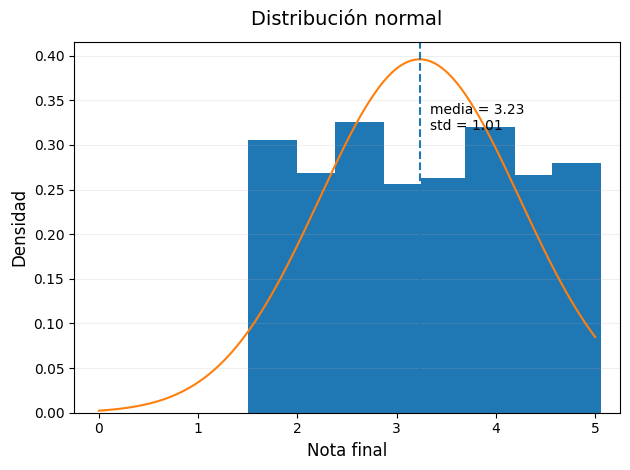

15.2) Gráfico de barras del Top 5 de cursos con más estudiantes


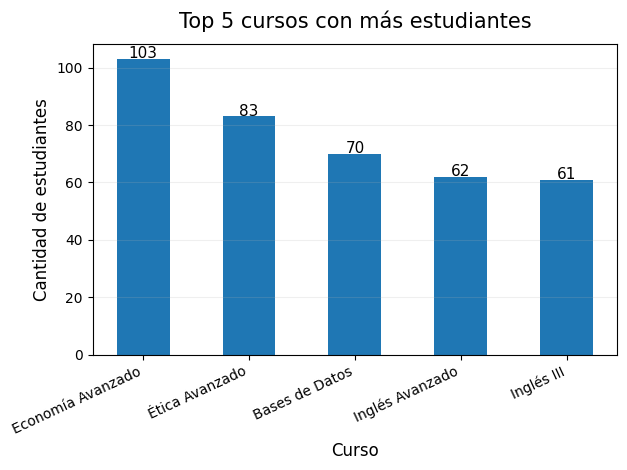

In [31]:
# Espacio para Python / Pandas
# 12. Consulta del punto 11 (Sábana de Notas)
print("12) Consulta Sábana de Notas, solo 5 registros y el esquema")
sql_notas = """
                        SELECT 
                            e.nombre AS Nombre_Estudiante,
                            e.apellido AS Apellido_Estudiante,
                            c.nombre_curso AS Nombre_Curso,             
                            i.nota_final AS Nota_Final,
                            p.nombre || ' ' || p.apellido AS Nombre_Profesor
                        FROM Estudiantes e
                        INNER JOIN Inscripciones i ON e.id_estudiante = i.id_estudiante
                        INNER JOIN Cursos c ON i.id_curso = c.id_curso
                        INNER JOIN Profesores p ON c.id_profesor = p.id_profesor
"""
df_notas = pd.read_sql_query(sql_notas, conn)
display(df_notas.head(5)) 
df_notas.info()

# 13. Filtra el DataFrame `df_notas` para encontrar a los estudiantes que van perdiendo (Nota < 3.0).
#  Guárdalos en un nuevo DF `df_riesgo` y cuenta cuántos son.
print("13) Filtra estudiantes en riesgo (Nota < 3.0) y cuenta cuantos son")
df_riesgo = df_notas[df_notas['Nota_Final'] < 3.0]
display(df_riesgo)
print(f"Cantidad de estudiantes en riesgo: {len(df_riesgo)}")

# 14. Crea una tabla dinámica que muestre el **Promedio de Notas** (values) organizados por `Nombre Curso` (index) y `Nombre Profesor` (columns).
print("14) Crea una tabla con el Promedio de Notas por Nombre Curso y Nombre Profesor")
sql_promedio_notas = """
                                SELECT 
                                    p.nombre  || ' ' || p.apellido  AS Nombre_Profesor,
                                    c.nombre_curso AS Nombre_Curso,             
                                    avg(i.nota_final) AS Promedio_de_Notas
                                FROM Estudiantes e
                                INNER JOIN Inscripciones i ON e.id_estudiante = i.id_estudiante
                                INNER JOIN Cursos c ON i.id_curso = c.id_curso
                                INNER JOIN Profesores p ON c.id_profesor = p.id_profesor
                                group by  p.nombre  || ' ' || p.apellido, c.nombre_curso
        """
df_promedio_notas = pd.read_sql_query(sql_promedio_notas, conn)
display(df_promedio_notas) 


# 15.  Usando el DataFrame `df_notas`, crea un histograma o un gráfico de barras que muestre la distribución de las notas finales.
# *Opcional:* Un gráfico de barras con el Top 5 de cursos con más estudiantes.
 
print("15.1) Gráfico de barras del Promedio de Notas por Curso")
notas = df_notas["Nota_Final"]
media = notas.mean()
std = notas.std()
plt.figure()
plt.hist(notas, bins=8, density=True, width=0.5)
x = np.linspace(0, 5, 200)
y = (1 / (std * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x - media) / std) ** 2)
plt.plot(x, y)
plt.axvline(media, linestyle="dashed")
plt.text(media + 0.1, max(y)*0.8, f"media = {media:.2f}\nstd = {std:.2f}", fontsize=10)
plt.title("Distribución normal", fontsize=14, pad=12)
plt.xlabel("Nota final", fontsize=12)
plt.ylabel("Densidad", fontsize=12)
plt.grid(axis="y", alpha=0.2)
plt.tight_layout()
plt.show()

print("15.2) Gráfico de barras del Top 5 de cursos con más estudiantes")
df_count = df_notas.groupby("Nombre_Curso")["Nombre_Estudiante"].count().reset_index()
df_count = df_count.rename(columns={"Nombre_Estudiante": "Total_Estudiantes"})
df_top5 = df_count.sort_values("Total_Estudiantes", ascending=False).head(5)
plt.figure()
plt.bar(df_top5["Nombre_Curso"], df_top5["Total_Estudiantes"], width=0.5)
for x, y in zip(df_top5["Nombre_Curso"], df_top5["Total_Estudiantes"]):
    plt.text(x, y + 0.2, str(y), ha="center", fontsize=11)
plt.title("Top 5 cursos con más estudiantes", fontsize=15, pad=12)
plt.xlabel("Curso", fontsize=12)
plt.ylabel("Cantidad de estudiantes", fontsize=12)
plt.xticks(rotation=25, ha="right", fontsize=10)
plt.grid(axis="y", alpha=0.2)
plt.tight_layout()
plt.show()


# conn.close()
# print("¡Examen Finalizado!")